In [6]:
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
         y2,
         (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2]
    return f

In [7]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.5
# Spring constants
k1 = 8.0
k2 = 40.0
# Natural lengths
L1 = 0.5
L2 = 1.0
# Friction coefficients
b1 = 0.8
b2 = 0.5

# Initial conditions
# x1 and x2 are the initial displacements; y1 and y2 are the initial velocities
x1 = 0.5
y1 = 0.0
x2 = 2.25
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('two_springs.dat', 'w') as f:
    # Print & save the solution.
    #for t1, w1 in zip(t, wsol):
     #   print >> f, t1, w1[0], w1[1], w1[2], w1[3]
    for t1, w1 in zip(t, wsol): 
        print(t1, w1[0], w1[1], w1[2], w1[3], file=open("two_springs.dat", "a"))

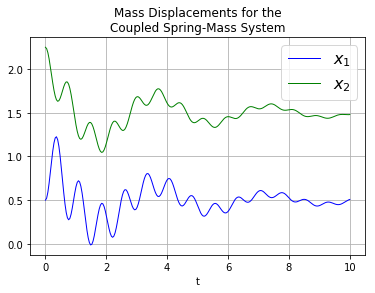

In [9]:
# Plot the solution that was generated
from numpy import loadtxt
#from pylab import figure, plot, xlabel, grid, hold, legend, title, savefig
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

#figure(1, figsize=(6, 4.5))

plt.xlabel('t')
plt.grid(True)
#hold(True)
lw = 1

plt.plot(t, x1, 'b', linewidth=lw)
plt.plot(t, x2, 'g', linewidth=lw)

plt.legend((r'$x_1$', r'$x_2$'),prop=FontProperties(size=16))
plt.title('Mass Displacements for the\nCoupled Spring-Mass System')
plt.savefig('two_springs.png', dpi=100)

*Siguiendo la misma estructura del código, se modelará con la intención de que sea ahora con tres resortes*

In [12]:
def vectorfield(w, t, p):
    """
   Defino las ecuaciones diferenciales para un sistema de dos masas unidas por 3 resortes
    Arguments:
        w :  vector de variables establecidad:
                  w = [x1,y1,x2,y2]
        t :  tiempo
        p :  Vectro de parametros:
                  p = [m1,m2,k1,k2,k3,L1,L2,b1,b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, k3, L1, L2, b1, b2 = p

    # Creamos f = (x1',y1',x2',y2'):
    f = [y1,
         (-b1 * y1 - k1 * (x1 - L1) - k2 * ( x1 - L1 + L2 - x2 )) / m1,
         y2,
         (-b2 * y2 - k3 * ( x2 - L2 ) - k2 * ( x2 - L2 + L1 - x1 ))/ m2]
    return f

In [13]:
from scipy.integrate import odeint

# Parametros!
# Masas:
m1 = 1.0
m2 = 1.0
# Constantes de los resortes
k1 = 1.0
k2 = 1.0
k3 = 1.0
# Longitud natural de los resortes
L1 = 1.0
L2 = 1.0
# Coeficientes de friccion
b1 = 0
b2 = 0

# Condiciones iniciales
# x1 y x2 son desplazamientos iniciales; 
#y1 y y2 son velocidades iniciales
x1 = 1.0
y1 = 0.0
x2 = 0.0
y2 = 0.0

# parametros para resolver las EDO
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 50.0
numpoints = 1000

# Creamos los lapsos de tiempo para las soluciones de las EDO.
# Con un gran numero de puntos para tener una mejor apreciacion del
# Resultado
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Cargamos los parametros y las condiciones iniciales:
p = [m1, m2, k1, k2, k3, L1, L2, b1, b2]
w0 = [x1, y1, x2, y2]

# Llamo a la soluciones de la EDO.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)

with open('tres_resortes.dat', 'w') as f:
    for t1, w1 in zip(t, wsol): 
        print(t1, w1[0], w1[1], w1[2], w1[3], file=open("tres_resortes.dat", "a"))

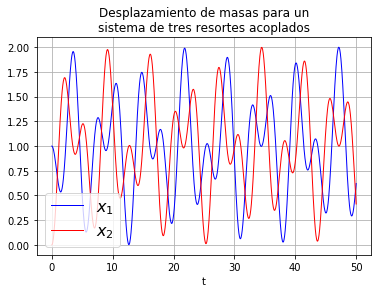

In [16]:
# Grafica de la solucion obtenida 
from numpy import loadtxt
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

t, x1, xy, x2, y2 = loadtxt('tres_resortes.dat', unpack=True)

#figure(1, figsize=(10, 10))

plt.xlabel('t')
plt.grid(True)
#hold(True)
lw = 1

plt.plot(t, x1, 'b', linewidth=lw)
plt.plot(t, x2, 'r', linewidth=lw)

plt.legend((r'$x_1$', r'$x_2$'),prop=FontProperties(size=16))
plt.title('Desplazamiento de masas para un\nsistema de tres resortes acoplados')
plt.savefig('tres_resortes.png', dpi=100)